# Visualización de Datos

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pathlib import Path
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import requests
import os

# Cargar la base datos.

In [130]:
# Cargar base desde CSV
base_total = pd.read_excel("bbdd/base_total_homologada.xlsx")

# Ver las primeras filas
print(base_total.head())

   anio                                           CARRERA  \
0  2020                                        Astronomía   
1  2023                                     Bioingeniería   
2  2023                              Ingeniería Comercial   
3  2020                             Nutrición y Dietética   
4  2020  Traducción/Interpretación en Idiomas Extranjeros   

               INGRESO  PTJE_PONDERADO  PTJE_PONDERADO_PACE NACIONALIDAD  \
0  Técnico Profesional          644.40                  NaN      Chilena   
1  Técnico Profesional          646.95                  NaN      Chilena   
2  Técnico Profesional          641.40                  NaN      Chilena   
3  Técnico Profesional          585.50                  NaN      Chilena   
4  Técnico Profesional          580.00                  NaN      Chilena   

        SEXO                             NOMBRE_COLEGIO_EGRESO  \
0  MASCULINO                         LICEO TECNICO ANTOFAGASTA   
1  MASCULINO    COLEGIO BICENTENARIO ENRIQUE

# Personas matriculadas en términos totales. 

In [141]:
# Asegurarse de que ANIO sea numérico
base_total["ANIO"] = pd.to_numeric(base_total["ANIO"], errors="coerce")

# Filtrar para años desde 2023
base_total = base_total[base_total["ANIO"] >= 2023].copy()

# Verificar el resultado
print(base_total["ANIO"].value_counts().sort_index())



2023    5070
2024    5234
2025    5251
Name: ANIO, dtype: int64


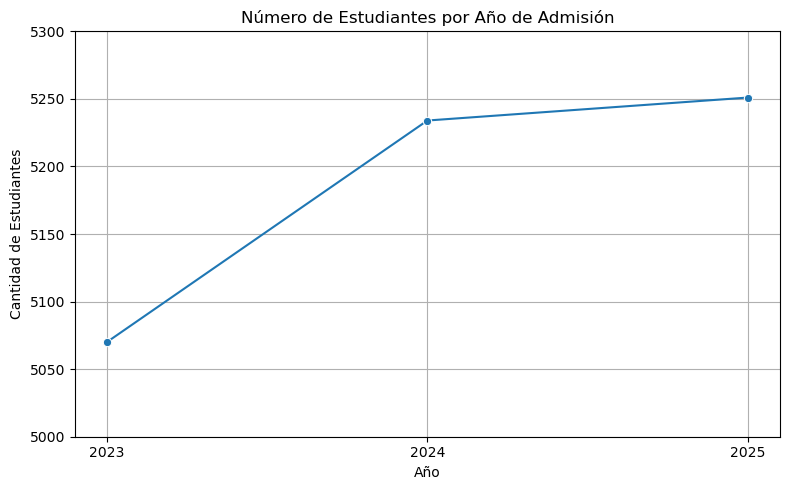

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar estudiantes por año
anio_count = base_total["ANIO"].value_counts().sort_index().reset_index()
anio_count.columns = ["ANIO", "N_ESTUDIANTES"]

# Crear gráfico de líneas
plt.figure(figsize=(8, 5))
sns.lineplot(data=anio_count, x="ANIO", y="N_ESTUDIANTES", marker="o")

# Mostrar solo años enteros
plt.xticks(anio_count["ANIO"])
plt.ylim(5000, 5300)  # Limitar eje Y de 5000 a 5300
plt.title("Número de Estudiantes por Año de Admisión")
plt.xlabel("Año")
plt.ylabel("Cantidad de Estudiantes")
plt.grid(True)
plt.tight_layout()
plt.show()




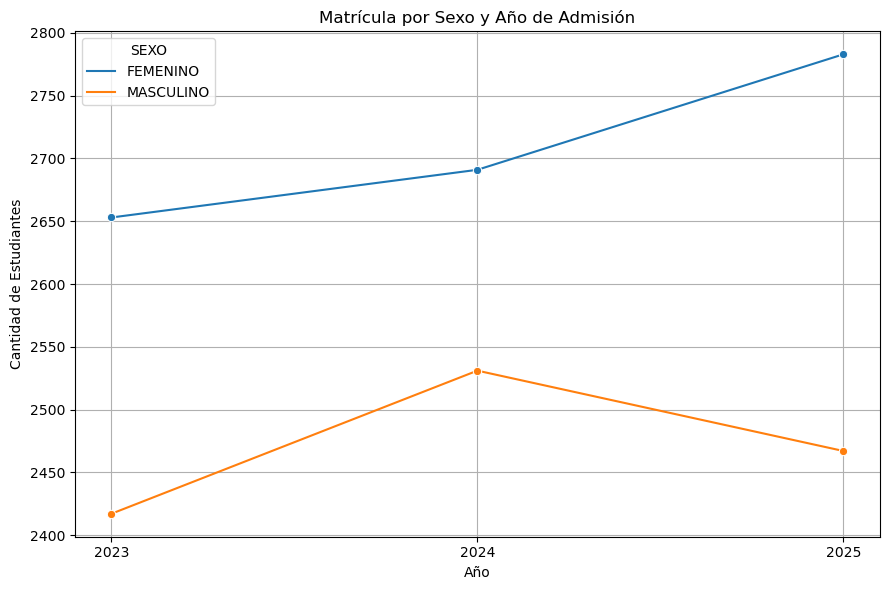

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que ANIO es numérico
base_total["ANIO"] = pd.to_numeric(base_total["ANIO"], errors="coerce")

# Filtrar años desde 2023 en adelante (opcional)
base_filtrada = base_total[base_total["ANIO"] >= 2023].copy()

# Agrupar por año y sexo
df_sexo_anio = base_filtrada.groupby(["ANIO", "SEXO"]).size().reset_index(name="N_ESTUDIANTES")

# Crear gráfico
plt.figure(figsize=(9, 6))
sns.lineplot(data=df_sexo_anio, x="ANIO", y="N_ESTUDIANTES", hue="SEXO", marker="o")

# Estética
plt.title("Matrícula por Sexo y Año de Admisión")
plt.xlabel("Año")
plt.ylabel("Cantidad de Estudiantes")
plt.xticks(sorted(df_sexo_anio["ANIO"].unique()))  # Asegura que los años estén ordenados
plt.grid(True)
plt.tight_layout()
plt.show()


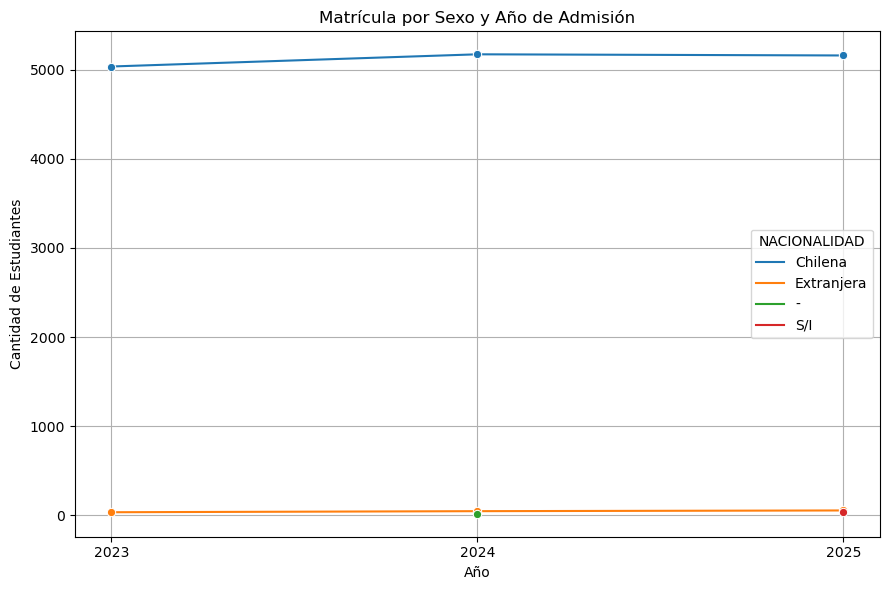

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que ANIO es numérico
base_total["ANIO"] = pd.to_numeric(base_total["ANIO"], errors="coerce")

# Filtrar años desde 2023 en adelante (opcional)
base_filtrada = base_total[base_total["ANIO"] >= 2023].copy()

# Agrupar por año y sexo
df_sexo_anio = base_filtrada.groupby(["ANIO", "NACIONALIDAD"]).size().reset_index(name="N_ESTUDIANTES")

# Crear gráfico
plt.figure(figsize=(9, 6))
sns.lineplot(data=df_sexo_anio, x="ANIO", y="N_ESTUDIANTES", hue="NACIONALIDAD", marker="o")

# Estética
plt.title("Matrícula por Sexo y Año de Admisión")
plt.xlabel("Año")
plt.ylabel("Cantidad de Estudiantes")
plt.xticks(sorted(df_sexo_anio["ANIO"].unique()))  # Asegura que los años estén ordenados
plt.grid(True)
plt.tight_layout()
plt.show()


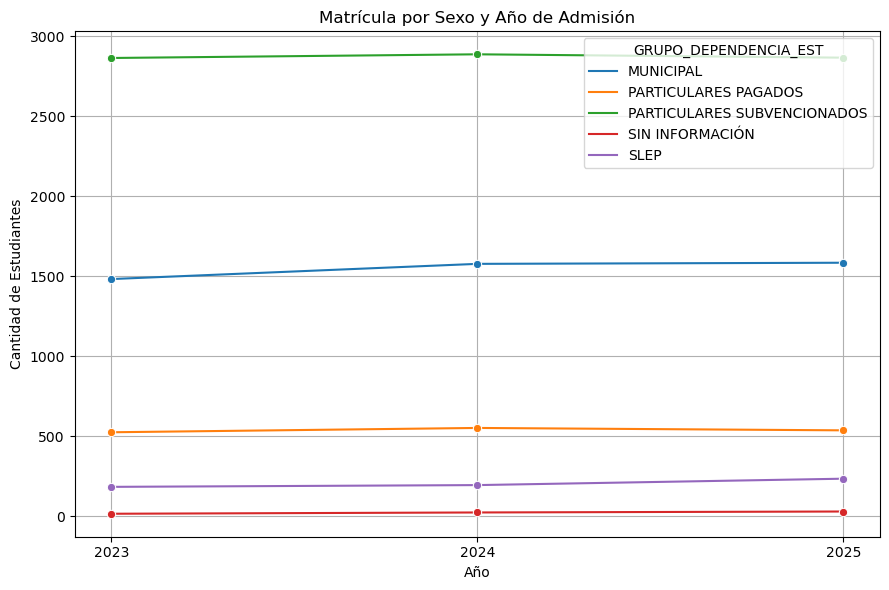

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que ANIO es numérico
base_total["ANIO"] = pd.to_numeric(base_total["ANIO"], errors="coerce")

# Filtrar años desde 2023 en adelante (opcional)
base_filtrada = base_total[base_total["ANIO"] >= 2023].copy()

# Agrupar por año y sexo
df_sexo_anio = base_filtrada.groupby(["ANIO", "GRUPO_DEPENDENCIA_EST"]).size().reset_index(name="N_ESTUDIANTES")

# Crear gráfico
plt.figure(figsize=(9, 6))
sns.lineplot(data=df_sexo_anio, x="ANIO", y="N_ESTUDIANTES", hue="GRUPO_DEPENDENCIA_EST", marker="o")

# Estética
plt.title("Matrícula por Sexo y Año de Admisión")
plt.xlabel("Año")
plt.ylabel("Cantidad de Estudiantes")
plt.xticks(sorted(df_sexo_anio["ANIO"].unique()))  # Asegura que los años estén ordenados
plt.grid(True)
plt.tight_layout()
plt.show()


# Ahora hagamos lo de los puntajes. 

 Esta podría ser la primera base de datos referida,a por ejemplo, a promedios. De igual forma, se podría crear otra que sea puntaje de corte, aunque en todo caso la idea es ser más claro con el CADE. 
 

In [146]:
import pandas as pd

# Asumiendo que tu DataFrame se llama df
base_total['PTJE_PONDERADO_TOTAL'] = base_total['PTJE_PONDERADO'].fillna(base_total['PTJE_PONDERADO_PACE'])

# Agrupar por carrera y año, y calcular promedio
promedios = (
    base_total.groupby(['CARRERA', 'ANIO'])['PTJE_PONDERADO_TOTAL']
    .mean()
    .reset_index()
    .rename(columns={'PTJE_PONDERADO_TOTAL': 'PROMEDIO_PONDERADO'})
)

print(promedios)


                                              CARRERA  ANIO  \
0           Administración Pública y Ciencia Política  2023   
1           Administración Pública y Ciencia Política  2024   
2           Administración Pública y Ciencia Política  2025   
3                                           Agronomía  2023   
4                                           Agronomía  2024   
..                                                ...   ...   
220                                    Trabajo Social  2024   
221                                    Trabajo Social  2025   
222  Traducción/Interpretación en Idiomas Extranjeros  2023   
223  Traducción/Interpretación en Idiomas Extranjeros  2024   
224  Traducción/Interpretación en Idiomas Extranjeros  2025   

     PROMEDIO_PONDERADO  
0          12904.225570  
1            760.600610  
2          35052.730000  
3            643.072419  
4          12523.957092  
..                  ...  
220        11451.326712  
221        12125.676027  
222      

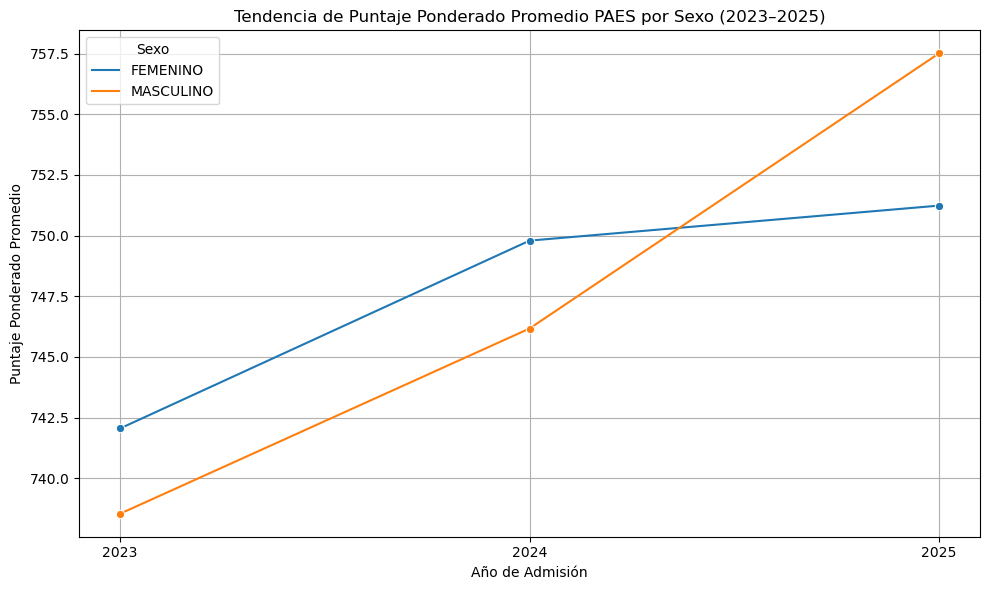

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que ANIO sea string para el eje x
base_total["ANIO"] = base_total["ANIO"].astype(str)

# Agrupar por año y sexo, calcular promedio del puntaje
df_grouped = base_total.groupby(["ANIO", "SEXO"])["PTJE_PONDERADO"].mean().reset_index()

# Crear gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x="ANIO", y="PTJE_PONDERADO", hue="SEXO", marker="o")

# Títulos y etiquetas
plt.title("Tendencia de Puntaje Ponderado Promedio PAES por Sexo (2023–2025)")
plt.xlabel("Año de Admisión")
plt.ylabel("Puntaje Ponderado Promedio")
plt.legend(title="Sexo")
plt.grid(True)
plt.tight_layout()
plt.show()

In [170]:
import plotly.express as px

# Asegurarse de que ANIO esté como string
base_total["ANIO"] = base_total["ANIO"].astype(str)

# Agrupar por año y sexo
df_grouped = base_total.groupby(["ANIO", "SEXO"])["PTJE_PONDERADO"].mean().reset_index()

# Crear gráfico interactivo
fig = px.bar(
    df_grouped,
    x="ANIO",
    y="PTJE_PONDERADO",
    color="SEXO",
    barmode="group",
    text_auto=".1f",
    labels={
        "ANIO": "Año de Admisión",
        "PTJE_PONDERADO": "Puntaje Ponderado Promedio",
        "SEXO": "Sexo"
    },
    title="Promedio Puntaje Ponderado PAES por Sexo y Año"
)

# Ajustes estéticos
fig.update_layout(
    yaxis=dict(range=[500, 1000]),
    xaxis=dict(type="category"),
    legend_title_text="Sexo",
    template="simple_white"
)

fig.show()



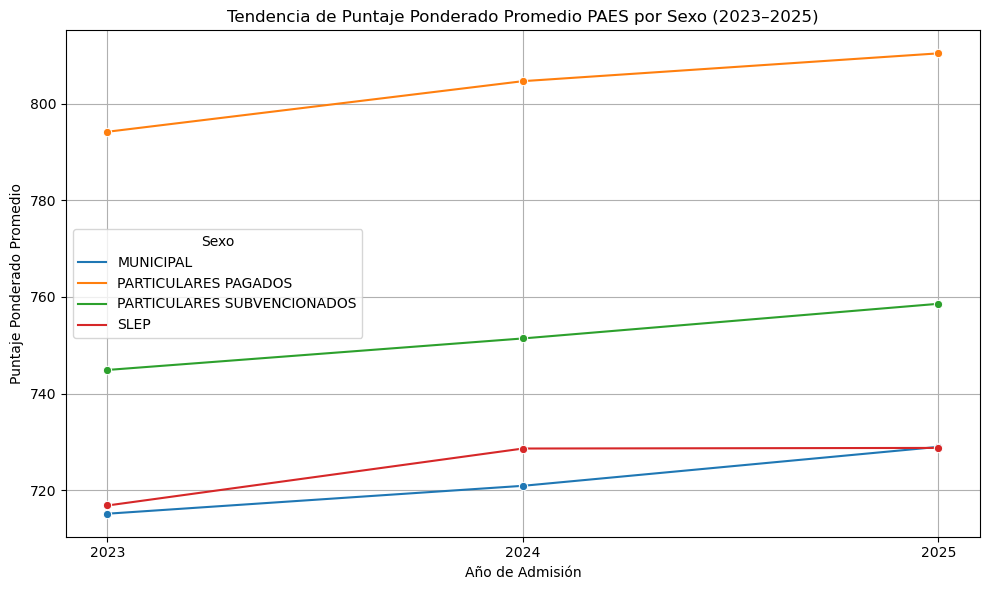

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que ANIO sea string para el eje x
base_total["ANIO"] = base_total["ANIO"].astype(str)

# Eliminar grupo "SIN INFORMACIÓN"
base_total = base_total[base_total["GRUPO_DEPENDENCIA_EST"] != "SIN INFORMACIÓN"].copy()


# Agrupar por año y sexo, calcular promedio del puntaje
df_grouped = base_total.groupby(["ANIO", "GRUPO_DEPENDENCIA_EST"])["PTJE_PONDERADO"].mean().reset_index()

# Crear gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x="ANIO", y="PTJE_PONDERADO", hue="GRUPO_DEPENDENCIA_EST", marker="o")

# Títulos y etiquetas
plt.title("Tendencia de Puntaje Ponderado Promedio PAES por Grupo de Dependencia (2023–2025)")
plt.xlabel("Año de Admisión")
plt.ylabel("Puntaje Ponderado Promedio")
plt.legend(title="Sexo")
plt.grid(True)
plt.tight_layout()
plt.show()

In [167]:

import plotly.express as px

# Asegurarse de que ANIO es string
base_total["ANIO"] = base_total["ANIO"].astype(str)

# Eliminar grupo "SIN INFORMACIÓN"
base_filtrada = base_total[base_total["GRUPO_DEPENDENCIA_EST"] != "SIN INFORMACIÓN"].copy()

# Agrupar por año y grupo de dependencia
df_grouped = base_filtrada.groupby(["ANIO", "GRUPO_DEPENDENCIA_EST"])["PTJE_PONDERADO"].mean().reset_index()

# Ordenar categorías de menor a mayor puntaje promedio general
orden_dependencias = (
    df_grouped.groupby("GRUPO_DEPENDENCIA_EST")["PTJE_PONDERADO"]
    .mean()
    .sort_values()
    .index.tolist()
)
df_grouped["GRUPO_DEPENDENCIA_EST"] = pd.Categorical(df_grouped["GRUPO_DEPENDENCIA_EST"], categories=orden_dependencias, ordered=True)

# Crear gráfico interactivo
fig = px.bar(
    df_grouped,
    x="ANIO",
    y="PTJE_PONDERADO",
    color="GRUPO_DEPENDENCIA_EST",
    barmode="group",
    category_orders={"GRUPO_DEPENDENCIA_EST": orden_dependencias},
    labels={
        "ANIO": "Año de Admisión",
        "PTJE_PONDERADO": "Puntaje Ponderado Promedio",
        "GRUPO_DEPENDENCIA_EST": "Dependencia"
    },
    title="Promedio Puntaje Ponderado PAES por Grupo de Dependencia y Año"
)

# Ajustes estéticos
fig.update_layout(
    yaxis=dict(range=[500, 1000]),
    xaxis=dict(type="category"),
    legend_title_text="Dependencia",
    bargap=0.15
)

fig.show()


In [168]:
import plotly.express as px

# Asegurarse de que el año esté como numérico
base_total["ANIO"] = pd.to_numeric(base_total["ANIO"], errors="coerce")

# Filtrar solo estudiantes del año 2025
base_2025 = base_total[base_total["ANIO"] == 2025].copy()

# Crear gráfico de torta por tipo de ingreso
fig = px.pie(
    base_2025,
    names="INGRESO",
    title="Distribución de Estudiantes por Tipo de Ingreso (2025)",
    hole=0.3  # Si prefieres un gráfico tipo 'donut'
)

# Estilo de etiquetas
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')

fig.show()


In [162]:
# Agrupar por año e ingreso
tabla_ingreso = (
    base_total.groupby(["ANIO", "INGRESO"])["PTJE_PONDERADO"]
    .mean()
    .reset_index()
    .sort_values(["ANIO", "PTJE_PONDERADO"], ascending=[True, False])
)

# Mostrar tabla
print(tabla_ingreso)


    ANIO                                INGRESO  PTJE_PONDERADO
7   2023                              EXCEPCIÓN      885.400000
11  2023                                REGULAR      742.857884
1   2023       BUEN RENDIMIENTO ENSEÑANZA MEDIA      727.588889
6   2023                   EXCELENCIA ACADÉMICA      721.311972
4   2023  DESTACADO EN ARTES, CIENCIAS O LETRAS      703.630000
5   2023                                  ETNIA      696.938462
9   2023                    HIJO DE FUNCIONARIO      690.526923
0   2023                           BACHILLERATO      664.411538
12  2023                    TÉCNICO PROFESIONAL      663.700000
2   2023                   COLEGIOS VULNERABLES      655.846512
3   2023            DEPORTISTA ALTO RENDIMIENTO      624.412500
8   2023                 FORMACIÓN PROPEDÉUTICA      524.937500
10  2023                                   PACE             NaN
13  2024                           BACHILLERATO      841.092857
14  2024       BUEN RENDIMIENTO ENSEÑANZ

In [166]:
import plotly.express as px

# Crear gráfico interactivo
fig = px.line(
    tabla_ingreso,
    x="ANIO",
    y="PTJE_PONDERADO",
    color="INGRESO",
    markers=True,
    title="Evolución del Puntaje Ponderado Promedio PAES por Tipo de Ingreso",
    labels={
        "ANIO": "Año de Admisión",
        "PTJE_PONDERADO": "Puntaje Ponderado Promedio",
        "INGRESO": "Tipo de Ingreso"
    }
)

# Ajustar layout
fig.update_layout(
    yaxis=dict(range=[500, 1000]),
    xaxis=dict(type='category'),
    legend_title_text="Filtrar por ingreso"
)

fig.show()


Acá creamos una nueva base de datos que refiere a la proporción por sexo. 

In [147]:
# Asegúrate de que 'SEXO' esté estandarizado (por ejemplo: "FEMENINO", "MASCULINO")
# Si el DataFrame se llama base_total y ya contiene las columnas 'CARRERA_LIMPIA', 'ANIO' y 'SEXO':

# Paso 1: Crear tabla de conteo
tabla_conteo = (
    base_total
    .groupby(['CARRERA', 'ANIO', 'SEXO'])
    .size()
    .reset_index(name='n')
)

# Paso 2: Calcular proporciones dentro de cada grupo CARRERA x AÑO
tabla_conteo['proporcion'] = (
    tabla_conteo
    .groupby(['CARRERA', 'ANIO'])['n']
    .transform(lambda x: x / x.sum())
)

# Paso 3 (opcional): ordenar la tabla para facilitar lectura
tabla_conteo = tabla_conteo.sort_values(by=['CARRERA', 'ANIO', 'SEXO'])

# Mostrar la tabla
print(tabla_conteo)



                                              CARRERA  ANIO       SEXO   n  \
0           Administración Pública y Ciencia Política  2023   FEMENINO  45   
1           Administración Pública y Ciencia Política  2023  MASCULINO  34   
2           Administración Pública y Ciencia Política  2024   FEMENINO  44   
3           Administración Pública y Ciencia Política  2024  MASCULINO  38   
4           Administración Pública y Ciencia Política  2025   FEMENINO  57   
..                                                ...   ...        ...  ..   
441  Traducción/Interpretación en Idiomas Extranjeros  2023  MASCULINO  20   
442  Traducción/Interpretación en Idiomas Extranjeros  2024   FEMENINO  75   
443  Traducción/Interpretación en Idiomas Extranjeros  2024  MASCULINO  11   
444  Traducción/Interpretación en Idiomas Extranjeros  2025   FEMENINO  61   
445  Traducción/Interpretación en Idiomas Extranjeros  2025  MASCULINO  19   

     proporcion  
0      0.569620  
1      0.430380  
2      0.

In [148]:
import pandas as pd

# Variables de puntaje que te podrían interesar
puntajes = ['PTJE_PONDERADO', 'PTJE_NEM', 'PTJE_RANKING', 'MATEMATICA_1', 'COMPRENSION_LECTORA']

# Crear tabla con estadísticas por carrera y grupo de dependencia
tabla_puntajes = (
    base_total
    .groupby(['CARRERA', 'GRUPO_DEPENDENCIA_EST'])[puntajes]
    .agg(['mean', 'median', 'min', 'max', 'count'])
    .reset_index()
)

# Mostrar la tabla
print(tabla_puntajes)


                                              CARRERA  \
                                                        
0           Administración Pública y Ciencia Política   
1           Administración Pública y Ciencia Política   
2           Administración Pública y Ciencia Política   
3           Administración Pública y Ciencia Política   
4           Administración Pública y Ciencia Política   
..                                                ...   
340  Traducción/Interpretación en Idiomas Extranjeros   
341  Traducción/Interpretación en Idiomas Extranjeros   
342  Traducción/Interpretación en Idiomas Extranjeros   
343  Traducción/Interpretación en Idiomas Extranjeros   
344  Traducción/Interpretación en Idiomas Extranjeros   

           GRUPO_DEPENDENCIA_EST PTJE_PONDERADO                           \
                                           mean   median     min     max   
0                      MUNICIPAL     772.013559  766.650  594.90  877.40   
1           PARTICULARES PAGAD

In [91]:
# Crear carpeta para guardar los geojson
os.makedirs("comunas_geojson", exist_ok=True)

# Base URL del repositorio
base_url = "https://raw.githubusercontent.com/robsalasco/censo_2017_geojson_chile/master/Comunas/"

# Lista de archivos por región (R01 a R16)
region_codes = [f"R{str(i).zfill(2)}.geojson" for i in range(1, 17)]

# Descargar todos los archivos geojson
for filename in region_codes:
    url = base_url + filename
    response = requests.get(url)
    if response.status_code == 200:
        with open(f"comunas_geojson/{filename}", "wb") as f:
            f.write(response.content)
        print(f"Descargado: {filename}")
    else:
        print(f"Error al descargar: {filename}")

# Cargar todos los archivos .geojson y unirlos
import glob

geojson_files = glob.glob("comunas_geojson/R*.geojson")

comunas_gdf = gpd.GeoDataFrame(pd.concat(
    [gpd.read_file(file) for file in geojson_files],
    ignore_index=True
))

# Ver columnas disponibles
print("Columnas disponibles en geojson:", comunas_gdf.columns)


Descargado: R01.geojson
Descargado: R02.geojson
Descargado: R03.geojson
Descargado: R04.geojson
Descargado: R05.geojson
Descargado: R06.geojson
Descargado: R07.geojson
Descargado: R08.geojson
Descargado: R09.geojson
Descargado: R10.geojson
Descargado: R11.geojson
Descargado: R12.geojson
Descargado: R13.geojson
Descargado: R14.geojson
Descargado: R15.geojson
Descargado: R16.geojson
Columnas disponibles en geojson: Index(['REGION', 'NOM_REGION', 'PROVINCIA', 'NOM_PROVIN', 'COMUNA',
       'NOM_COMUNA', 'SHAPE_Leng', 'SHAPE_Area', 'geometry'],
      dtype='object')


In [135]:
import pandas as pd
import geopandas as gpd

# Filtrar solo datos del año 2025
base_2025 = base_total[base_total["ANIO"] == 2025].copy()

# Asegurar que los códigos comunales tengan 5 dígitos
base_2025["codigo_comuna"] = base_2025["CODIGO_COMUNA"].astype(str).str.zfill(5)

# Asegurar también en el shapefile
comunas_gdf["codigo_comuna"] = comunas_gdf["COMUNA"].astype(str).str.zfill(5)

# Excluir Isla de Pascua si es necesario
comunas_gdf = comunas_gdf[~comunas_gdf["NOM_COMUNA"].str.upper().str.contains("ISLA DE PASCUA")]

# Calcular el puntaje ponderado promedio por comuna (solo año 2025)
df_resumen = base_2025.groupby("codigo_comuna")["PTJE_PONDERADO"].mean().reset_index()
df_resumen.columns = ["codigo_comuna", "puntaje_ponderado"]

# Hacer el merge con los datos geográficos (LEFT JOIN para mantener todas las comunas)
comunas_mapa = comunas_gdf.merge(df_resumen, on="codigo_comuna", how="left")

# Rellenar NaN con 0 (para comunas sin estudiantes)
comunas_mapa["puntaje_ponderado"] = comunas_mapa["puntaje_ponderado"].fillna(0)

# Resultado final
comunas_mapa



,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,SHAPE_Leng,SHAPE_Area,geometry,codigo_comuna,puntaje_ponderado
0,2,REGIÓN DE ANTOFAGASTA,21,ANTOFAGASTA,2104,TALTAL,7.585353,1.830171,"MULTIPOLYGON (((-70.65719 -26.06046, -70.65736...",02104,0.000000
1,2,REGIÓN DE ANTOFAGASTA,21,ANTOFAGASTA,2101,ANTOFAGASTA,11.103241,2.730900,"MULTIPOLYGON (((-70.50432 -24.0748, -70.50437 ...",02101,800.217500
2,2,REGIÓN DE ANTOFAGASTA,22,EL LOA,2201,CALAMA,6.047938,1.365895,"MULTIPOLYGON (((-67.94302 -22.38175, -67.94455...",02201,765.267143
3,2,REGIÓN DE ANTOFAGASTA,22,EL LOA,2202,OLLAGÜE,2.647094,0.254682,"MULTIPOLYGON (((-68.0713 -21.98166, -68.07285 ...",02202,0.000000
4,2,REGIÓN DE ANTOFAGASTA,22,EL LOA,2203,SAN PEDRO DE ATACAMA,6.777875,2.080407,"MULTIPOLYGON (((-68.06846 -24.32702, -68.07395...",02203,712.100000
...,...,...,...,...,...,...,...,...,...,...,...
662,7,REGIÓN DEL MAULE,73,CURICÓ,7301,CURICÓ,3.255823,0.132022,"MULTIPOLYGON (((-71.15915 -34.90337, -71.16128...",07301,760.045833
663,7,REGIÓN DEL MAULE,74,LINARES,7402,COLBÚN,4.388699,0.292772,"MULTIPOLYGON (((-70.56981 -36.13247, -70.57161...",07402,0.000000
664,7,REGIÓN DEL MAULE,73,CURICÓ,7306,ROMERAL,2.649292,0.158445,"MULTIPOLYGON (((-70.58218 -35.27233, -70.58331...",07306,773.050000
665,7,REGIÓN DEL MAULE,71,TALCA,7109,SAN CLEMENTE,4.577273,0.448358,"MULTIPOLYGON (((-71.15263 -35.388, -71.14087 -...",07109,0.000000


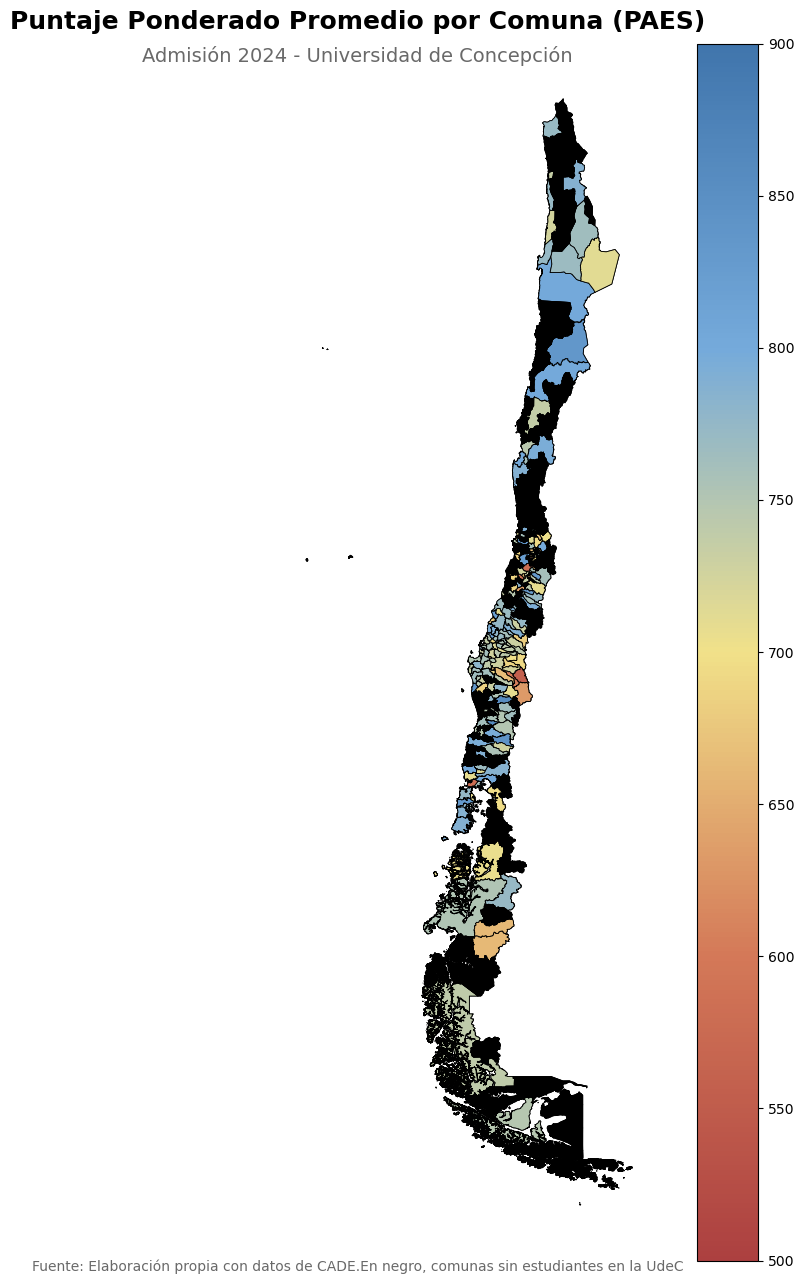

In [99]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Crear paleta personalizada
custom_cmap = LinearSegmentedColormap.from_list(
    "custom_blue_red",
    ["#AC4040", "#D47958", "#F1E189", "#75AADB", "#4075AC"]
)

# Crear figura
fig, ax = plt.subplots(1, 1, figsize=(10, 13))

# 1. Graficar todas las comunas con puntaje distinto de 0
comunas_mapa[comunas_mapa["puntaje_ponderado"] != 0].plot(
    column="puntaje_ponderado",
    cmap=custom_cmap,
    linewidth=0.6,
    edgecolor="black",
    legend=True,
    ax=ax,
    vmin=500,
    vmax=900
)

# 2. Sobreponer comunas con puntaje 0 en negro
comunas_mapa[comunas_mapa["puntaje_ponderado"] == 0].plot(
    color="black",
    linewidth=0.6,
    edgecolor="black",
    ax=ax
)

# Título
plt.suptitle("Puntaje Ponderado Promedio por Comuna (PAES)",
             fontsize=18, weight="bold", color="black", y=0.98)

# Subtítulo
plt.figtext(0.5, 0.94, "Admisión 2024 - Universidad de Concepción",
            ha='center', fontsize=14, color="dimgray")

# Caption principal
plt.figtext(0.5, 0.01,
            "Fuente: Elaboración propia con datos de CADE."
            "En negro, comunas sin estudiantes en la UdeC",
            wrap=True, horizontalalignment='center', fontsize=10, color="dimgray")


# Eliminar ejes
ax.axis("off")

# Ajustar márgenes
plt.tight_layout()
plt.show()



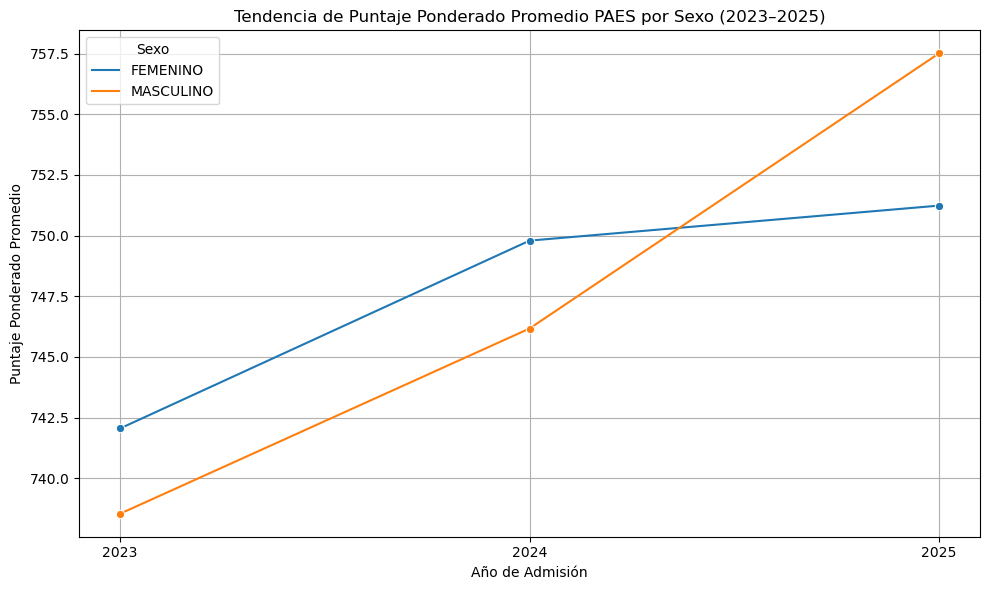

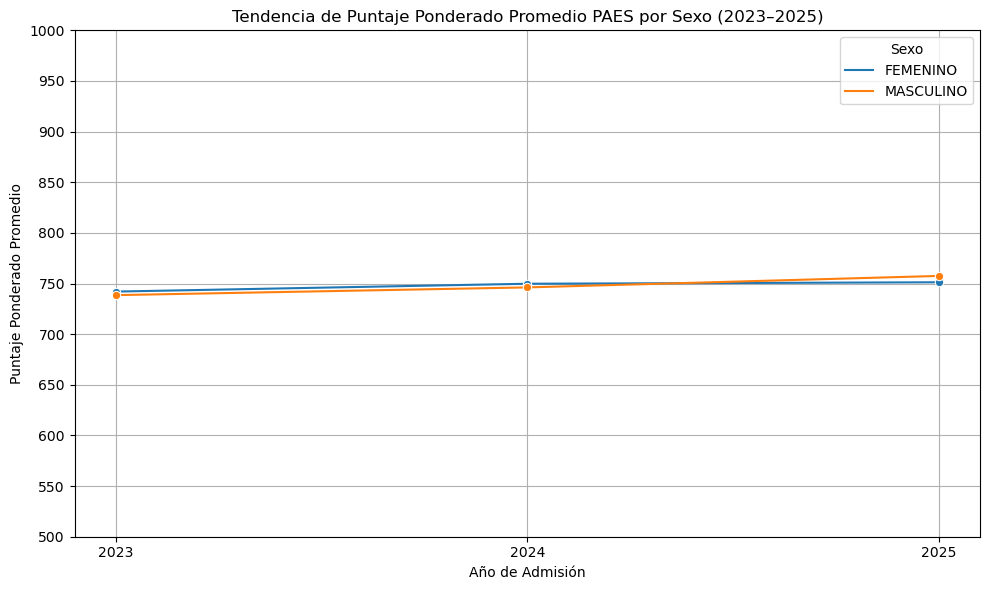

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Asegurarse de que ANIO sea string para el eje x
base_total["ANIO"] = base_total["ANIO"].astype(str)

# Agrupar por año y sexo, calcular promedio del puntaje
df_grouped = base_total.groupby(["ANIO", "SEXO"])["PTJE_PONDERADO"].mean().reset_index()

# Crear gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x="ANIO", y="PTJE_PONDERADO", hue="SEXO", marker="o")

# Personalizar eje Y
plt.ylim(500, 1000)
plt.yticks(np.arange(500, 1001, 50))  # marcas cada 50 puntos

# Títulos y etiquetas
plt.title("Tendencia de Puntaje Ponderado Promedio PAES por Sexo (2023–2025)")
plt.xlabel("Año de Admisión")
plt.ylabel("Puntaje Ponderado Promedio")
plt.legend(title="Sexo")
plt.grid(True)
plt.tight_layout()
plt.show()


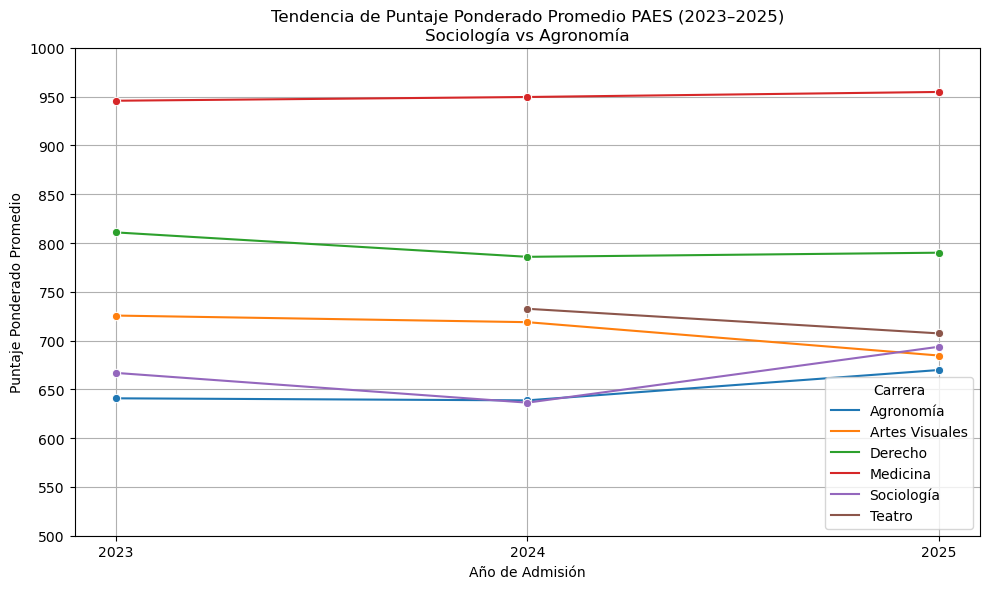

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Asegurarse de que ANIO sea string para el eje x
base_total["ANIO"] = base_total["ANIO"].astype(str)

# Filtrar por Sociología y Agronomía
carreras_filtradas = ["Sociología", "Agronomía", "Medicina", "Derecho", "Artes Visuales", "Teatro"]
df_filtrado = base_total[base_total["CARRERA"].isin(carreras_filtradas)]

# Agrupar por año y carrera, calcular promedio del puntaje
df_grouped = df_filtrado.groupby(["ANIO", "CARRERA"])["PTJE_PONDERADO"].mean().reset_index()

# Crear gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x="ANIO", y="PTJE_PONDERADO", hue="CARRERA", marker="o")

# Personalizar eje Y
plt.ylim(500, 1000)
plt.yticks(np.arange(500, 1001, 50))  # marcas cada 50 puntos

# Títulos y etiquetas
plt.title("Tendencia de Puntaje Ponderado Promedio PAES (2023–2025)")
plt.xlabel("Año de Admisión")
plt.ylabel("Puntaje Ponderado Promedio")
plt.legend(title="Carrera")
plt.grid(True)
plt.tight_layout()
plt.show()



In [36]:
# Agrupar por ANIO, SEXO y CARRERA (asumo que la columna se llama 'CARRERA')
df_n_por_sexo = base_total.groupby(["ANIO", "SEXO", "CARRERA"]).size().reset_index(name="N")

# Mostrar los primeros resultados
print(df_n_por_sexo.head())




   ANIO      SEXO                                    CARRERA   N
0  2023  FEMENINO  Administración Pública y Ciencia Política  45
1  2023  FEMENINO                                  Agronomía  59
2  2023  FEMENINO                               Antropología  43
3  2023  FEMENINO                               Arquitectura  59
4  2023  FEMENINO                             Artes Visuales  42


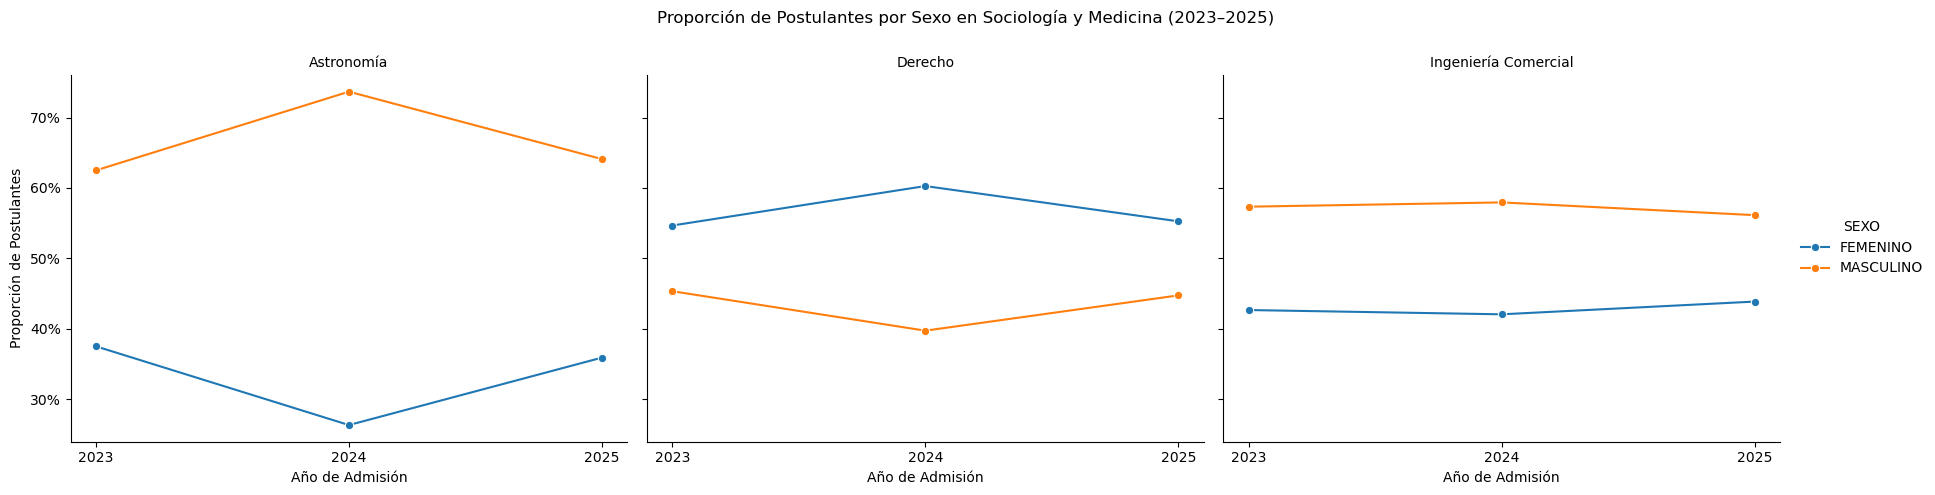

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo las carreras Sociología y Medicina
df_filtrado = base_total[
    base_total["CARRERA"].str.lower().str.contains("ingeniería comercial|astronomía|derecho")
].copy()

# Asegurar que ANIO sea string
df_filtrado["ANIO"] = df_filtrado["ANIO"].astype(str)

# Calcular N por ANIO, SEXO y CARRERA
df_n = df_filtrado.groupby(["ANIO", "SEXO", "CARRERA"]).size().reset_index(name="N")

# Calcular proporciones dentro de cada ANIO y CARRERA
df_n["TOTAL"] = df_n.groupby(["ANIO", "CARRERA"])["N"].transform("sum")
df_n["PROPORCION"] = df_n["N"] / df_n["TOTAL"]

# Crear gráfico de líneas proporcionales (faceteado por carrera)
g = sns.FacetGrid(df_n, col="CARRERA", hue="SEXO", height=5, aspect=1.2, sharey=True)
g.map(sns.lineplot, "ANIO", "PROPORCION", marker="o").add_legend()

# Títulos y etiquetas
g.set_axis_labels("Año de Admisión", "Proporción de Postulantes")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Proporción de Postulantes por Sexo en Sociología y Medicina (2023–2025)")

# Opcional: formato porcentual en eje Y
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

plt.show()



In [53]:
# Agrupar por ANIO, SEXO y CARRERA
df_n_por_sexo = base_total.groupby(["ANIO", "SEXO", "CARRERA"]).size().reset_index(name="N")

# Pivotear la tabla
df_ratio = df_n_por_sexo.pivot_table(index=["ANIO", "CARRERA"], columns="SEXO", values="N", fill_value=0).reset_index()

# Eliminar nombre del índice de columnas
df_ratio.columns.name = None

In [56]:
import numpy as np

df_ratio["ratio_fem_masc"] = df_ratio["FEMENINO"] / df_ratio["MASCULINO"].replace(0, np.nan)

print(df_ratio)


     ANIO                                           CARRERA  FEMENINO  \
0    2023         Administración Pública y Ciencia Política        45   
1    2023                                         Agronomía        59   
2    2023                                      Antropología        43   
3    2023                                      Arquitectura        59   
4    2023                                    Artes Visuales        42   
..    ...                                               ...       ...   
219  2025                                        Sociología        24   
220  2025                                            Teatro        27   
221  2025                                 Tecnología Médica        50   
222  2025                                    Trabajo Social        54   
223  2025  Traducción/Interpretación en Idiomas Extranjeros        61   

     MASCULINO  ratio_fem_masc  
0           34        1.323529  
1           65        0.907692  
2           23        1.

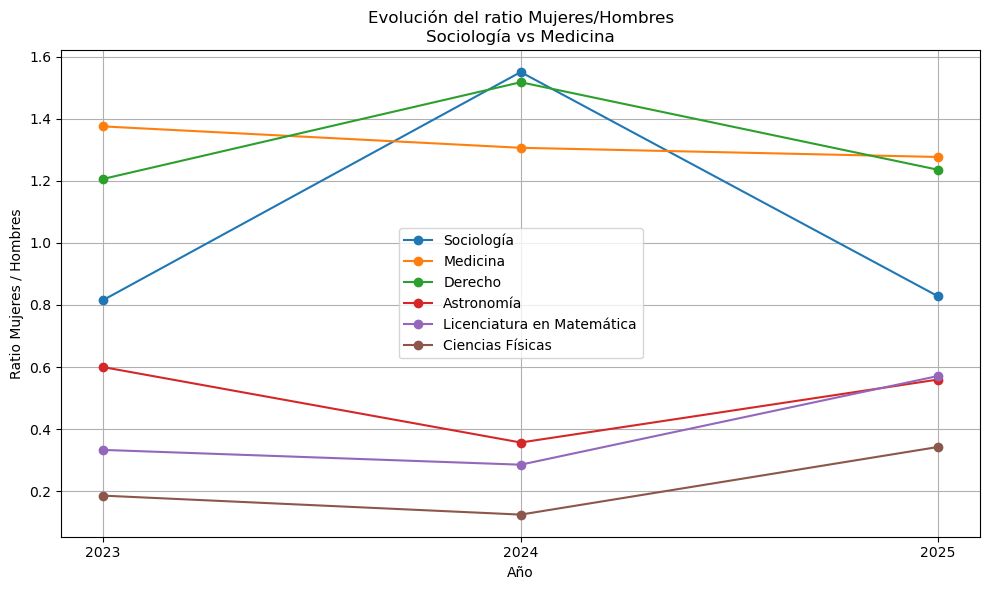

In [64]:
import matplotlib.pyplot as plt



# Filtrar por Sociología y Medicina
carreras_filtradas = ["Sociología", "Medicina", "Derecho", "Astronomía", "Licenciatura en Matemática", "Ciencias Físicas"]
df_filtrado = df_ratio[df_ratio["CARRERA"].isin(carreras_filtradas)].copy()

# Asegurarse de que los años estén ordenados
df_filtrado = df_filtrado.sort_values(["CARRERA", "ANIO"])

# Crear el gráfico
plt.figure(figsize=(10, 6))

for carrera in carreras_filtradas:
    df_sub = df_filtrado[df_filtrado["CARRERA"] == carrera]
    plt.plot(df_sub["ANIO"], df_sub["ratio_fem_masc"], marker="o", label=carrera)

plt.title("Evolución del ratio Mujeres/Hombres\nSociología vs Medicina")
plt.xlabel("Año")
plt.ylabel("Ratio Mujeres / Hombres")
plt.legend()
plt.grid(True)
plt.xticks(sorted(df_filtrado["ANIO"].unique()))
plt.tight_layout()
plt.show()


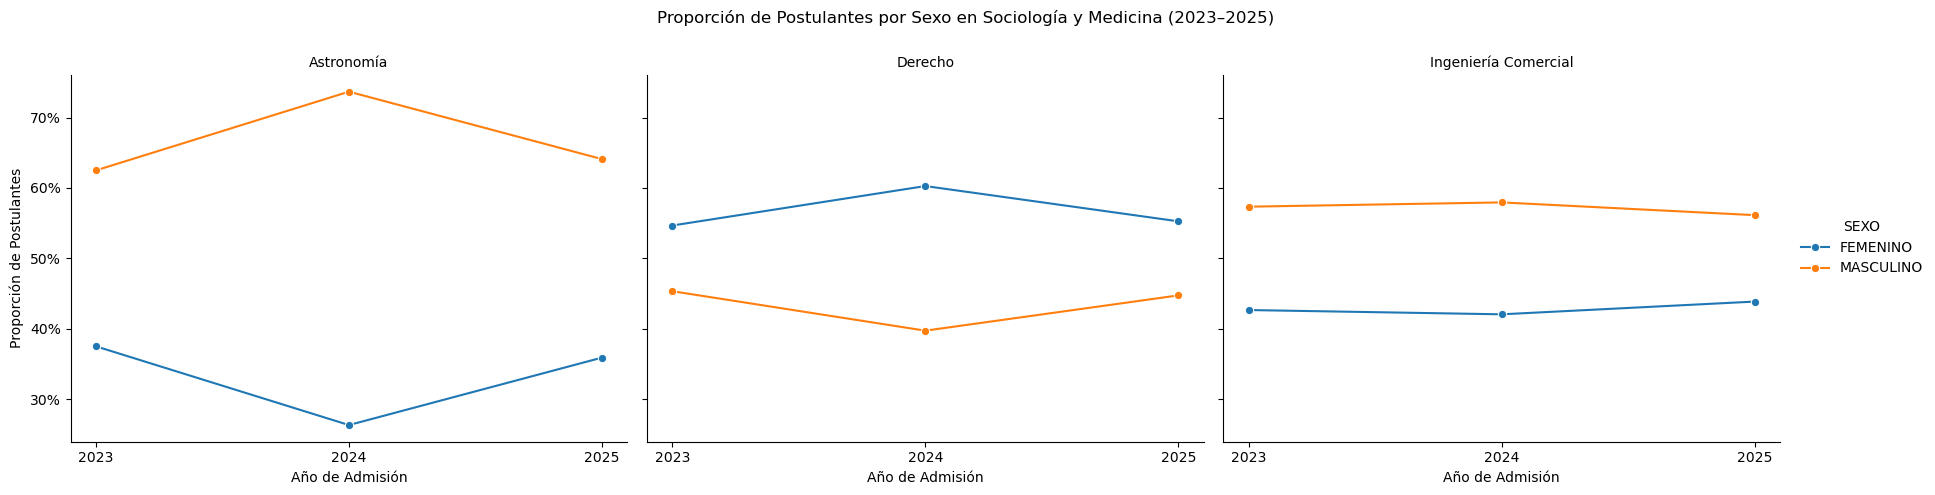

In [65]:
# Filtrar solo las carreras Sociología y Medicina
df_filtrado = base_total[
    base_total["CARRERA"].str.lower().str.contains("ingeniería comercial|astronomía|derecho")
].copy()

# Asegurar que ANIO sea string
df_filtrado["ANIO"] = df_filtrado["ANIO"].astype(str)

# Calcular N por ANIO, SEXO y CARRERA
df_n = df_filtrado.groupby(["ANIO", "SEXO", "CARRERA"]).size().reset_index(name="N")

# Calcular proporciones dentro de cada ANIO y CARRERA
df_n["TOTAL"] = df_n.groupby(["ANIO", "CARRERA"])["N"].transform("sum")
df_n["PROPORCION"] = df_n["N"] / df_n["TOTAL"]

# Crear gráfico de líneas proporcionales (faceteado por carrera)
g = sns.FacetGrid(df_n, col="CARRERA", hue="SEXO", height=5, aspect=1.2, sharey=True)
g.map(sns.lineplot, "ANIO", "PROPORCION", marker="o").add_legend()

# Títulos y etiquetas
g.set_axis_labels("Año de Admisión", "Proporción de Postulantes")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Proporción de Postulantes por Sexo en Sociología y Medicina (2023–2025)")

# Opcional: formato porcentual en eje Y
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

plt.show()

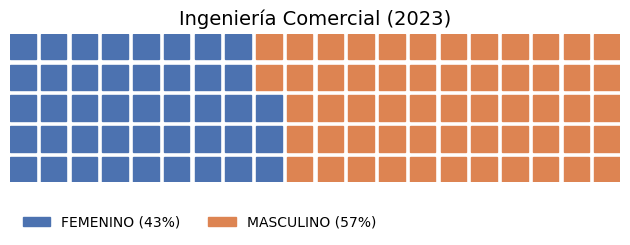

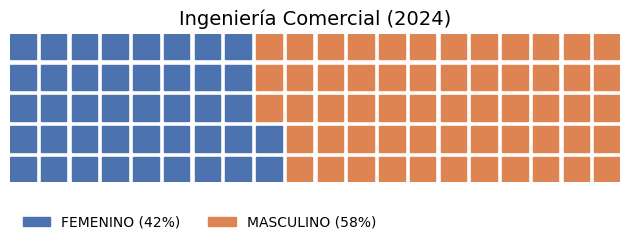

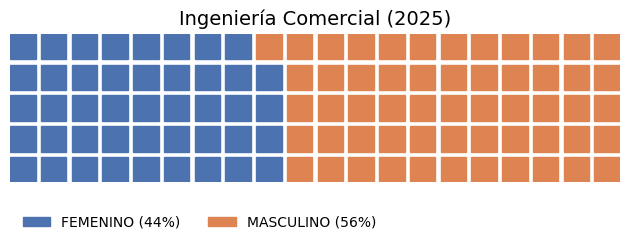

In [178]:
from pywaffle import Waffle
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar carreras de interés
df_filtrado = base_total[
    base_total["CARRERA"].str.lower().str.contains("ingeniería comercial")
].copy()

# Asegurar ANIO como string
df_filtrado["ANIO"] = df_filtrado["ANIO"].astype(str)

# Agrupar y calcular proporciones
df_n = df_filtrado.groupby(["ANIO", "SEXO", "CARRERA"]).size().reset_index(name="N")
df_n["TOTAL"] = df_n.groupby(["ANIO", "CARRERA"])["N"].transform("sum")
df_n["PROPORCION"] = df_n["N"] / df_n["TOTAL"]

# Crear un waffle por cada combinación ANIO–CARRERA
combinaciones = df_n[["ANIO", "CARRERA"]].drop_duplicates()

for _, fila in combinaciones.iterrows():
    anio = fila["ANIO"]
    carrera = fila["CARRERA"]
    
    sub_df = df_n[(df_n["ANIO"] == anio) & (df_n["CARRERA"] == carrera)]
    
    data = {sexo: int(round(prop * 100)) for sexo, prop in zip(sub_df["SEXO"], sub_df["PROPORCION"])}
    
    fig = plt.figure(
        FigureClass=Waffle,
        rows=5,
        values=data,
        colors=["#4c72b0", "#dd8452"],  # Puedes cambiar colores
        title={
            "label": f"{carrera} ({anio})",
            "loc": "center",
            "fontsize": 14
        },
        labels=[f"{k} ({v}%)" for k, v in data.items()],
        legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'frameon': False}
    )
    
    plt.tight_layout()
    plt.show()


In [179]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Filtrar carreras de interés
df_filtrado = base_total[
    base_total["CARRERA"].str.lower().str.contains("ingeniería comercial")
].copy()

# Asegurar ANIO como string
df_filtrado["ANIO"] = df_filtrado["ANIO"].astype(str)

# Agrupar y calcular proporciones
df_n = df_filtrado.groupby(["ANIO", "SEXO", "CARRERA"]).size().reset_index(name="N")
df_n["TOTAL"] = df_n.groupby(["ANIO", "CARRERA"])["N"].transform("sum")
df_n["PROPORCION"] = df_n["N"] / df_n["TOTAL"]

# Crear data para waffles
waffle_data = []

rows = 5
cols = 20  # 5x20 = 100 bloques

for (anio, carrera), group in df_n.groupby(["ANIO", "CARRERA"]):
    blocks = []
    for _, row in group.iterrows():
        count = int(round(row["PROPORCION"] * rows * cols))
        blocks.extend([row["SEXO"]] * count)
    
    # Limitar a 100 bloques exactos
    blocks = blocks[:rows * cols]

    # Generar coordenadas x, y para cada bloque
    x = [i % cols for i in range(len(blocks))]
    y = [-(i // cols) for i in range(len(blocks))]  # Negativo para apilar de arriba hacia abajo
    waffle_df = pd.DataFrame({
        "x": x,
        "y": y,
        "SEXO": blocks
    })
    waffle_df["ANIO"] = anio
    waffle_df["CARRERA"] = carrera
    waffle_data.append(waffle_df)

# Concatenar
df_waffle = pd.concat(waffle_data, ignore_index=True)

# Crear gráfico interactivo
fig = px.scatter(
    df_waffle,
    x="x",
    y="y",
    color="SEXO",
    facet_col="ANIO",
    facet_col_wrap=2,
    symbol="SEXO",
    title="Distribución de Sexo en Ingeniería Comercial por Año (formato tipo Waffle)",
    color_discrete_map={"M": "#4c72b0", "F": "#dd8452"},
)

# Ajustes visuales
fig.update_traces(marker=dict(size=12), selector=dict(mode='markers'))
fig.update_layout(
    showlegend=True,
    xaxis=dict(visible=False),
    yaxis=dict(visible=False),
    plot_bgcolor="white",
    height=400,
)
fig.for_each_xaxis(lambda ax: ax.update(showticklabels=False))
fig.for_each_yaxis(lambda ax: ax.update(showticklabels=False))

fig.show()


In [115]:
%No 
import pandas as pd
import geopandas as gpd
import glob


# Estandarizar código comuna
base_total["CODIGO_COMUNA"] = base_total["CODIGO_COMUNA"].astype(str).str.zfill(5)

# Unir archivos GeoJSON de comunas
geojson_files = glob.glob("comunas_geojson/R*.geojson")
comunas_gdf = gpd.GeoDataFrame(pd.concat(
    [gpd.read_file(file) for file in geojson_files],
    ignore_index=True
))

# Renombrar columna comunal del shapefile
comunas_gdf["codigo_comuna_geo"] = comunas_gdf["COMUNA"].astype(str).str.zfill(5)

# Unir geometría a base_total (mantiene todos los datos)
base_total_geo = pd.merge(
    base_total,
    comunas_gdf[["codigo_comuna_geo", "geometry"]],
    left_on="CODIGO_COMUNA",
    right_on="codigo_comuna_geo",
    how="left"
)

# Eliminar columna duplicada que no queremos
base_total_geo = base_total_geo.drop(columns=["codigo_comuna_geo"])

# Convertir a GeoDataFrame
base_total_geo = gpd.GeoDataFrame(base_total_geo, geometry="geometry")

# Exportar como GeoPackage
base_total_geo.to_file("bbdd/base_total.gpkg", layer="datos", driver="GPKG")

UsageError: Line magic function `%No` not found.


In [29]:
%No
import pandas as pd
import geopandas as gpd
import glob


# Estandarizar código comuna
base_total["CODIGO_COMUNA"] = base_total["CODIGO_COMUNA"].astype(str).str.zfill(5)

# Unir archivos GeoJSON de comunas
geojson_files = glob.glob("comunas_geojson/R*.geojson")
comunas_gdf = gpd.GeoDataFrame(pd.concat(
    [gpd.read_file(file) for file in geojson_files],
    ignore_index=True
))

# Renombrar columna comunal del shapefile
comunas_gdf["codigo_comuna_geo"] = comunas_gdf["COMUNA"].astype(str).str.zfill(5)

# Unir geometría a base_total (mantiene todos los datos)
base_total_geo = pd.merge(
    base_total,
    comunas_gdf[["codigo_comuna_geo", "geometry"]],
    left_on="CODIGO_COMUNA",
    right_on="codigo_comuna_geo",
    how="left"
)

# Eliminar columna duplicada que no queremos
base_total_geo = base_total_geo.drop(columns=["codigo_comuna_geo"])

# Convertir a GeoDataFrame
base_total_geo = gpd.GeoDataFrame(base_total_geo, geometry="geometry")

# Exportar como GeoPackage
base_total_geo.to_file("bbdd/base_total.gpkg", layer="datos", driver="GPKG")

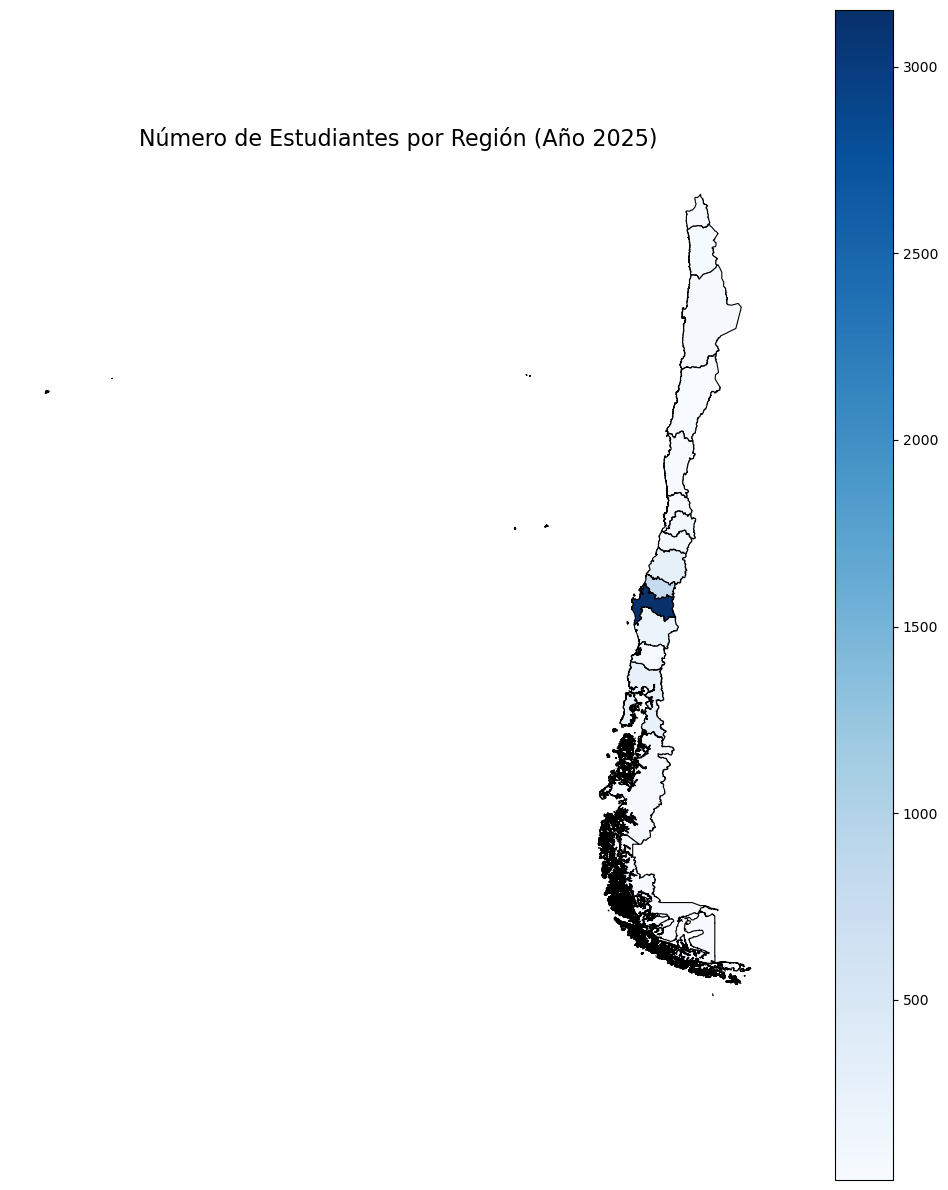

,REGION,geometry,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,SHAPE_Leng,SHAPE_Area
0,01,"MULTIPOLYGON (((-70.22723 -19.6084, -70.22761 ...",REGIÓN DE TARAPACÁ,14,TAMARUGAL,1401,POZO ALMONTE,6.717379,1.195248
1,02,"MULTIPOLYGON (((-70.65719 -26.06046, -70.65736...",REGIÓN DE ANTOFAGASTA,21,ANTOFAGASTA,2104,TALTAL,7.585353,1.830171
2,03,"MULTIPOLYGON (((-71.56565 -29.02413, -71.56507...",REGIÓN DE ATACAMA,31,COPIAPÓ,3101,COPIAPÓ,11.957986,1.622093
3,04,"MULTIPOLYGON (((-71.53073 -32.1294, -71.53022 ...",REGIÓN DE COQUIMBO,41,ELQUI,4101,LA SERENA,2.652602,0.177376
4,05,"MULTIPOLYGON (((-80.80437 -33.80198, -80.80446...",REGIÓN DE VALPARAÍSO,51,VALPARAÍSO,5101,VALPARAÍSO,1.517520,0.030572
5,06,"MULTIPOLYGON (((-71.55048 -34.87199, -71.55148...",REGIÓN DEL LIBERTADOR GENERAL BERNARDO O'HIGGINS,63,COLCHAGUA,6310,SANTA CRUZ,1.283181,0.038699
6,07,"MULTIPOLYGON (((-72.10313 -36.12602, -72.1029 ...",REGIÓN DEL MAULE,72,CAUQUENES,7201,CAUQUENES,3.122511,0.212263
7,08,"MULTIPOLYGON (((-73.9023 -38.44505, -73.90307 ...",REGIÓN DEL BIOBÍO,83,BIOBÍO,8308,QUILACO,2.879723,0.115371
8,09,"MULTIPOLYGON (((-72.87202 -39.28817, -72.8796 ...",REGIÓN DE LA ARAUCANÍA,91,CAUTÍN,9101,TEMUCO,1.170293,0.048145
9,10,"MULTIPOLYGON (((-74.81291 -43.63008, -74.81292...",REGIÓN DE LOS LAGOS,102,CHILOÉ,10202,ANCUD,5.780228,0.189078


In [123]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import glob

# 2. Filtrar solo estudiantes del año 2025
base_total = base_total[base_total["ANIO"] == 2025].copy()

# 3. Estandarizar código de región
base_total["CODIGO_REGION"] = base_total["CODIGO_REGION"].astype(str).str.zfill(2)

# 4. Crear variable n = 1 para contar estudiantes
base_total["n"] = 1

# 5. Agrupar por región sumando 'n'
region_count = base_total.groupby("CODIGO_REGION")["n"].sum().reset_index(name="N_ESTUDIANTES")

# 6. Unir archivos geojson de comunas
geojson_files = glob.glob("comunas_geojson/R*.geojson")
comunas = gpd.GeoDataFrame(pd.concat(
    [gpd.read_file(f) for f in geojson_files], ignore_index=True
))


# 7. Estandarizar código de región en comunas
comunas["REGION"] = comunas["REGION"].astype(str).str.zfill(2)

# 8. Agrupar geometría a nivel regional (dissolve)
regiones = comunas.dissolve(by="REGION", as_index=False)

# 9. Unir geometría con datos de estudiantes
gdf_regiones = regiones.merge(region_count, left_on="REGION", right_on="CODIGO_REGION", how="left")

# 10. Rellenar NaN con 0 (regiones sin estudiantes)
gdf_regiones["N_ESTUDIANTES"] = gdf_regiones["N_ESTUDIANTES"].fillna(0)

# 11. Plotear mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 12))
gdf_regiones.plot(
    column="N_ESTUDIANTES",
    cmap="Blues",
    linewidth=0.8,
    edgecolor="black",
    legend=True,
    ax=ax
)
ax.set_title("Número de Estudiantes por Región (Año 2025)", fontsize=16)
ax.axis("off")
plt.tight_layout()
plt.show()

# 12. Guardar la base si es necesario
gdf_regiones.to_file("bbdd/regiones_estudiantes_2025.gpkg", layer="estudiantes", driver="GPKG")
regiones

In [176]:
import pandas as pd
import plotly.express as px

# Asegurar que CODIGO_REGION sea numérico sin decimales
base_total["CODIGO_REGION"] = pd.to_numeric(base_total["CODIGO_REGION"], errors="coerce").astype("Int64")

# Filtrar por región específica (por ejemplo, región 8)
region_filtrada = base_total[base_total["CODIGO_REGION"] == 13].copy()

# Contar frecuencia de colegios
top_colegios = (
    region_filtrada["NOMBRE_COLEGIO_EGRESO"]
    .value_counts()
    .head(30)  # puedes ajustar el número de colegios
    .reset_index()
)
top_colegios.columns = ["NOMBRE_COLEGIO_EGRESO", "N_ESTUDIANTES"]

# Crear gráfico con Plotly
fig = px.bar(
    top_colegios,
    x="N_ESTUDIANTES",
    y="NOMBRE_COLEGIO_EGRESO",
    orientation="h",
    title="Colegios con más estudiantes (Región 8)",
    labels={"NOMBRE_COLEGIO_EGRESO": "Nombre del Colegio", "N_ESTUDIANTES": "Cantidad de Estudiantes"}
)

fig.update_layout(yaxis=dict(categoryorder='total ascending'))
fig.show()


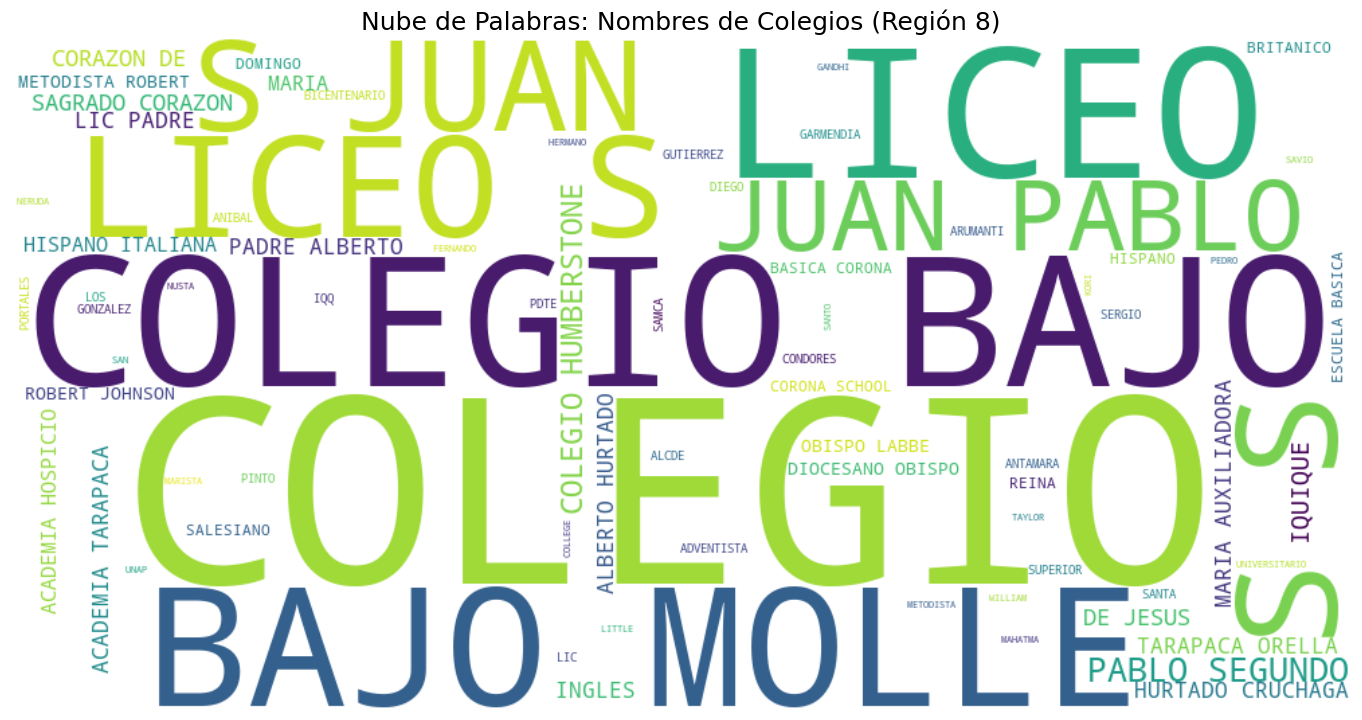

In [175]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Asegurar que CODIGO_REGION sea numérico sin decimales
base_total["CODIGO_REGION"] = pd.to_numeric(base_total["CODIGO_REGION"], errors="coerce").astype("Int64")

# Filtrar por región (puedes cambiar el número de región aquí)
region_filtrada = base_total[base_total["CODIGO_REGION"] == 1].copy()

# Unir todos los nombres de colegios en un solo texto
texto_colegios = " ".join(region_filtrada["NOMBRE_COLEGIO_EGRESO"].dropna())

# Crear word cloud
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color="white",
    max_words=100,
    colormap="viridis"
).generate(texto_colegios)

# Mostrar el gráfico
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras: Nombres de Colegios (Región 8)", fontsize=18)
plt.tight_layout(pad=0)
plt.show()
